## What is boosting?
Boosting term refers to a family of algorithms which convert weak learners to strong learners.

Let’s understand this definition in detail by solving a problem of spam email identification:

How would you classify an email as SPAM or not? Like everyone else, our initial approach would be to identify ‘spam’ and ‘not spam’ emails using following criteria. 

If:                              
Email has only one image file (promotional image), It’s a SPAM            
Email has only link(s), It’s a SPAM                
Email body consist of sentence like “You won a prize money of $ xxxxxx”, It’s a SPAM                  
Email from official domain “gmail.com” , Not a SPAM                  
Email from known source, Not a SPAM                        

Above, we’ve defined multiple rules to classify an email into ‘spam’ or ‘not spam’. But, do you think these rules individually are strong enough to successfully classify an email? No.

Individually, these rules are not powerful enough to classify an email into ‘spam’ or ‘not spam’. Therefore, these rules are called as weak learner.

To convert weak learner to strong learner, we'll combine the prediction of each weak learner using methods like:

    1. Using average/ weighted average
    2. Considering prediction has higher vote
    
For example:  Above, we have defined 5 weak learners. Out of these 5, 3 are voted as ‘SPAM’ and 2 are voted as ‘Not a SPAM’. In this case, by default, we’ll consider an email as SPAM because we have higher(3) vote for ‘SPAM’.

## How boosting algorithms works?

We understand that, boosting algorithms combines weak learner a.k.a base learner to form a strong rule. An immediate question which should pop in your mind is, ‘How boosting identify weak rules? 

To identify weak rule, we apply base learning(ML) algorithms with a different distribution. Each time base learning algorithm is applied, it generates a new weak prediction rule. This is iterative process, at the end of iterations boosting algorithm combine all weak learner to make a single strong prediction rule. 


For choosing the right distribution, here are the following steps:

Step 1:  The base learner takes all the distributions and assign equal weight or attention to each observation.

Step 2: If there is any prediction error caused by first base learning algorithm, then we pay higher attention to observations having prediction error. Then, we apply the next base learning algorithm.

Step 3: Iterate Step 2 till the limit of base learning algorithm is reached or higher accuracy is achieved.

Finally, it combines the outputs from weak learner and creates  a strong learner which eventually improves the prediction power of the model. Boosting pays higher focus on examples which are mis-classiﬁed or have higher errors by preceding weak rules.

## Types of Boosting Algorithms

Underlying engine used for boosting algorithms can be anything.  It can be decision stamp, margin-maximizing classification algorithm etc. There are many boosting algorithms which use other types of engine such as:

1. AdaBoost (Adaptive Boosting)
2. Gradient Tree Boosting
3. XGBoost

### AdaBoost (Adaptive Boosting)

It fits a sequence of weak learners on different weighted training data. It starts by predicting original data set and gives equal weight to each observation. If prediction is incorrect using the first learner, then it gives higher weight to observation which have been predicted incorrectly. Being an iterative process, it continues to add learner(s) until a limit is reached in the number of models or accuracy.

Mostly, we use decision stamps with AdaBoost. But, we can use any machine learning algorithms as base learner if it accepts weight on training data set. We can use AdaBoost algorithms for both classification and regression problem.

### Gradient Tree Boosting

In gradient boosting, it trains many model sequentially. Each new model gradually minimizes the loss function (y = ax + b + e, e needs special attention as it is an error term) of the whole system using Gradient Descent method. The learning procedure consecutively fit new models to provide a more accurate estimate of the response variable.

The principle idea behind this algorithm is to construct new base learners which can be maximally correlated with negative gradient of the loss function, associated with the whole ensemble.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/DAAG/spam7.csv")

In [4]:
data.head()

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno
0,1,278,0.000,0.778,0.00,0.00,0.00,y
1,2,1028,0.180,0.372,0.43,0.43,0.21,y
2,3,2259,0.184,0.276,0.06,1.16,0.06,y
3,4,191,0.000,0.137,0.00,0.00,0.00,y
4,5,191,0.000,0.135,0.00,0.00,0.00,y


In [5]:
data['spam'] = data['yesno'].map({'y': 1, 'n': 0})

In [6]:
data.head()

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno,spam
0,1,278,0.000,0.778,0.00,0.00,0.00,y,1
1,2,1028,0.180,0.372,0.43,0.43,0.21,y,1
2,3,2259,0.184,0.276,0.06,1.16,0.06,y,1
3,4,191,0.000,0.137,0.00,0.00,0.00,y,1
4,5,191,0.000,0.135,0.00,0.00,0.00,y,1


In [7]:
data = data.drop(['Unnamed: 0', 'yesno'], axis=1)

In [8]:
data

,crl.tot,dollar,bang,money,n000,make,spam
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1
3,191,0.000,0.137,0.00,0.00,0.00,1
4,191,0.000,0.135,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,0
4597,14,0.000,0.353,0.00,0.00,0.00,0
4598,118,0.000,0.000,0.00,0.00,0.30,0
4599,78,0.000,0.000,0.00,0.00,0.96,0


In [9]:
data.mean()

crl.tot    283.289285
dollar       0.075811
bang         0.269071
money        0.094269
n000         0.101645
make         0.104553
spam         0.394045
dtype: float64

In [10]:
data.groupby(['spam']).mean()

,crl.tot,dollar,bang,money,n000,make
spam,,,,,,
0,161.470947,0.011648,0.109984,0.017138,0.007088,0.073479
1,470.619415,0.174478,0.513713,0.212879,0.247055,0.152339


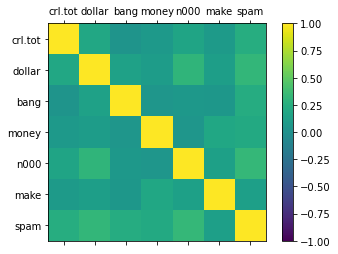

In [14]:
correlations = data.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names = ['']+list(data)

ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.show()

In [21]:
y = data.spam

df = data.loc[:, data.columns != 'spam']

df.head()

,crl.tot,dollar,bang,money,n000,make
0,278,0.000,0.778,0.00,0.00,0.00
1,1028,0.180,0.372,0.43,0.43,0.21
2,2259,0.184,0.276,0.06,1.16,0.06
3,191,0.000,0.137,0.00,0.00,0.00
4,191,0.000,0.135,0.00,0.00,0.00


In [22]:
#add features by generating interaction terms
dollar_bang=df['dollar']*df['bang']
dollar_money=df['dollar']*df['money']
dollar_n000=df['dollar']*df['n000']
dollar_make=df['dollar']*df['make']
dollar_crl=df['dollar']*df['crl.tot']

bang_money=df['bang']*df['money']
bang_n000=df['bang']*df['n000']
bang_make=df['bang']*df['make']
bang_crl=df['bang']*df['crl.tot']

money_n000=df['money']*df['n000']
money_make=df['money']*df['make']
money_crl=df['money']*df['crl.tot']

n000_make=df['n000']*df['make']
n000_crl=df['n000']*df['crl.tot']

make_crl=df['make']*df['crl.tot']

In [24]:
df = df.assign(dollar_bank=dollar_bang,dollar_money=dollar_money,dollar_n000=dollar_n000,dollar_make=dollar_make,
             dollar_crl=dollar_crl,bang_money=bang_money, bang_n000=bang_n000,
             bang_make=bang_make,bang_crl=bang_crl,money_n000=money_n000,money_make=money_make,money_crl=money_crl,
             n000_make=n000_make,n000_crl=n000_crl,make_crl=make_crl)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

,crl.tot,dollar,bang,money,n000,make,dollar_bank,dollar_money,dollar_n000,dollar_make,...,bang_money,bang_n000,bang_make,bang_crl,money_n000,money_make,money_crl,n000_make,n000_crl,make_crl
0,278,0.000,0.778,0.00,0.00,0.00,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,216.284,0.0000,0.0000,0.00,0.0000,0.00,0.00
1,1028,0.180,0.372,0.43,0.43,0.21,0.066960,0.07740,0.07740,0.03780,...,0.15996,0.15996,0.07812,382.416,0.1849,0.0903,442.04,0.0903,442.04,215.88
2,2259,0.184,0.276,0.06,1.16,0.06,0.050784,0.01104,0.21344,0.01104,...,0.01656,0.32016,0.01656,623.484,0.0696,0.0036,135.54,0.0696,2620.44,135.54
3,191,0.000,0.137,0.00,0.00,0.00,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,26.167,0.0000,0.0000,0.00,0.0000,0.00,0.00
4,191,0.000,0.135,0.00,0.00,0.00,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,25.785,0.0000,0.0000,0.00,0.0000,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.000,0.0000,0.0000,0.00,0.0000,0.00,27.28
4597,14,0.000,0.353,0.00,0.00,0.00,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,4.942,0.0000,0.0000,0.00,0.0000,0.00,0.00
4598,118,0.000,0.000,0.00,0.00,0.30,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.000,0.0000,0.0000,0.00,0.0000,0.00,35.40
4599,78,0.000,0.000,0.00,0.00,0.96,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.000,0.0000,0.0000,0.00,0.0000,0.00,74.88


In [29]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [33]:
clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, 
                                      min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)

clf.fit(X_train,y_train)

predictors = list(X_train)

dollar          0.238626
bang_crl        0.238256
bang            0.182430
dollar_bank     0.072435
money_crl       0.053079
money           0.042137
crl.tot         0.035987
bang_money      0.030029
dollar_crl      0.025975
n000            0.016145
dollar_money    0.016126
bang_n000       0.015490
dollar_n000     0.011859
n000_crl        0.006617
make_crl        0.006282
bang_make       0.002867
make            0.002354
dollar_make     0.001468
money_n000      0.000855
money_make      0.000622
n000_make       0.000362
dtype: float64

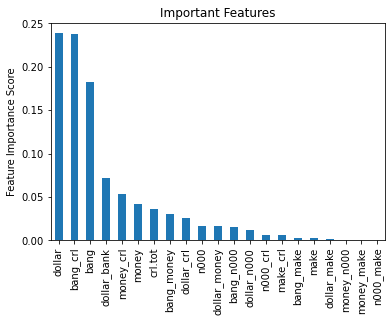

In [40]:
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)

feat_imp.plot(kind='bar', title='Important Features')
plt.ylabel('Feature Importance Score')

feat_imp

In [41]:
print('Accuracy of the GBM on test set: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of the GBM on test set: 0.869


In [43]:
pred = clf.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       566
           1       0.88      0.76      0.82       355

    accuracy                           0.87       921
   macro avg       0.87      0.85      0.86       921
weighted avg       0.87      0.87      0.87       921

[[531  35]
 [ 86 269]]


In [44]:
#parameter tuning

p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

In [50]:
tuning = GridSearchCV(estimator = GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, 
                                                             subsample=1,max_features='sqrt', random_state=10), 
                      param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)

tuning.grid_scores_, tuning.best_params_, tuning.best_score_

G:\Anaconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'